Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [15]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization


In [64]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(r"C:\Users\q802437\OneDrive - IQVIA\Documents\UpGrad\Melanoma\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_test = pathlib.Path(r'C:\Users\q802437\OneDrive - IQVIA\Documents\UpGrad\Melanoma\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test')

In [44]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [45]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [46]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds=tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, image_size=(img_height,img_width), subset='training', validation_split=0.2, batch_size=batch_size, label_mode='categorical', seed=123 )
val_ds=tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, image_size=(img_height,img_width), subset='validation', validation_split=0.2, batch_size=batch_size, label_mode='categorical', seed=123 )

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [48]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

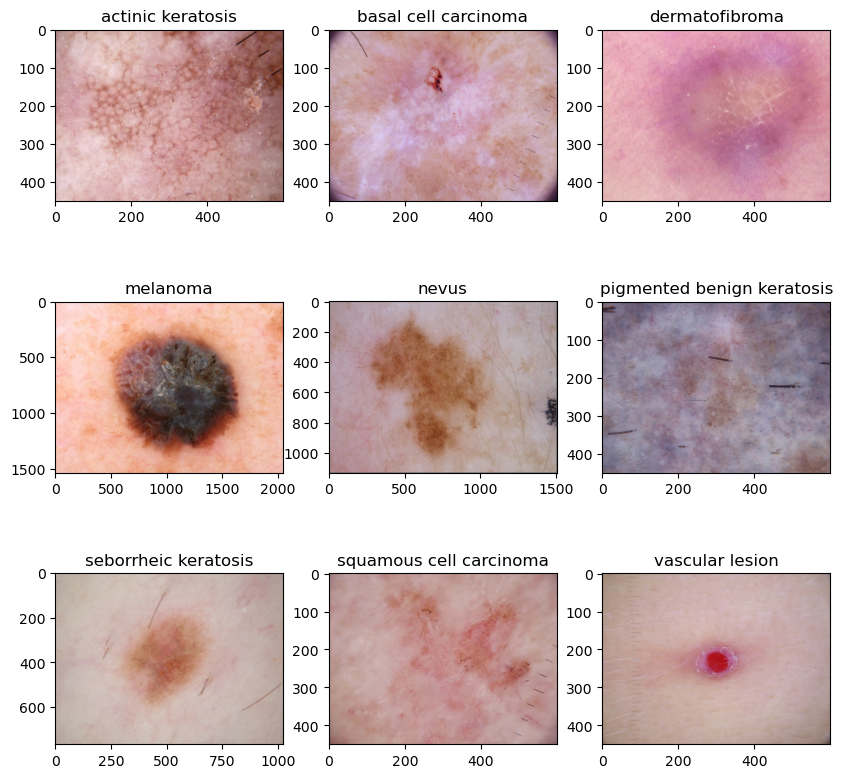

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[2]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [72]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.1


In [73]:
### Your code goes here
model=Sequential()
model.add(keras.layers.Rescaling(1./255,input_shape=(180,180,3)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(9,activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [74]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
# View the summary of all layers
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [76]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 36s 561ms/step - accuracy: 0.1856 - loss: 2.6358 - val_accuracy: 0.3177 - val_loss: 1.9750
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 531ms/step - accuracy: 0.2866 - loss: 1.9180 - val_accuracy: 0.3870 - val_loss: 1.7540
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 546ms/step - accuracy: 0.4261 - loss: 1.6456 - val_accuracy: 0.5168 - val_loss: 1.5057
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 545ms/step - accuracy: 0.5014 - loss: 1.4256 - val_accuracy: 0.4922 - val_loss: 1.4177
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 532ms/step - accuracy: 0.5016 - loss: 1.3608 - val_accuracy: 0.4609 - val_loss: 1.5863
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 551ms/step - accuracy: 0.5297 - loss: 1.3067 - val_accuracy: 0.5123 - val_loss: 1.5159
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 539ms/step - accuracy: 0.5338 - loss: 1.3135 - val_accuracy: 0.5078 - val_loss: 1.4820
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 550ms/step - accuracy: 0.5665 - loss: 1.2150 - val_accu

### Visualizing training results

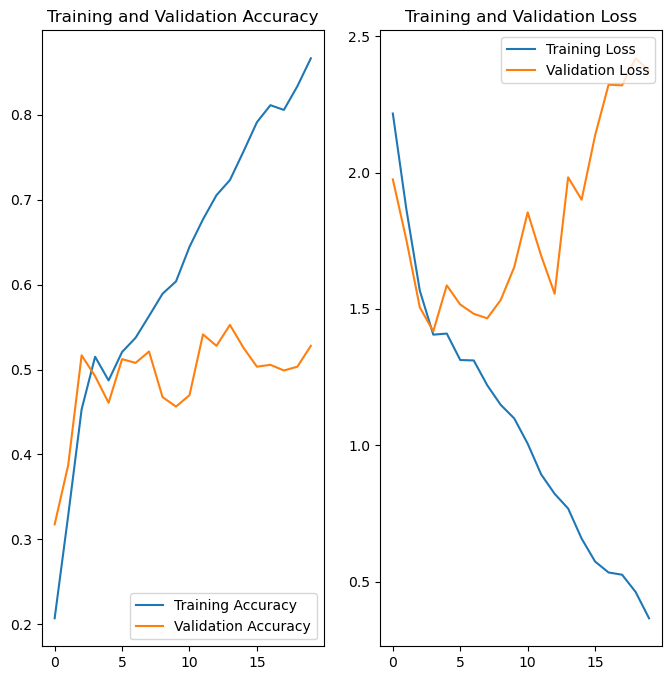

In [77]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [78]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - accuracy: 0.8987 - loss: 0.2880
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.5592 - loss: 2.2269
Accuracy:  0.8911830186843872
Validation Accuracy:  0.5279642343521118
Loss:  0.29267144203186035
Validation Loss 2.3741140365600586


### Finding from first model -
The model is overfitting because we can also see difference in accuracy and loss functions in training & validation set.

In [41]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augument = keras.Sequential([
                             layers.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.RandomRotation(0.2, fill_mode='reflect'),
                             layers.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

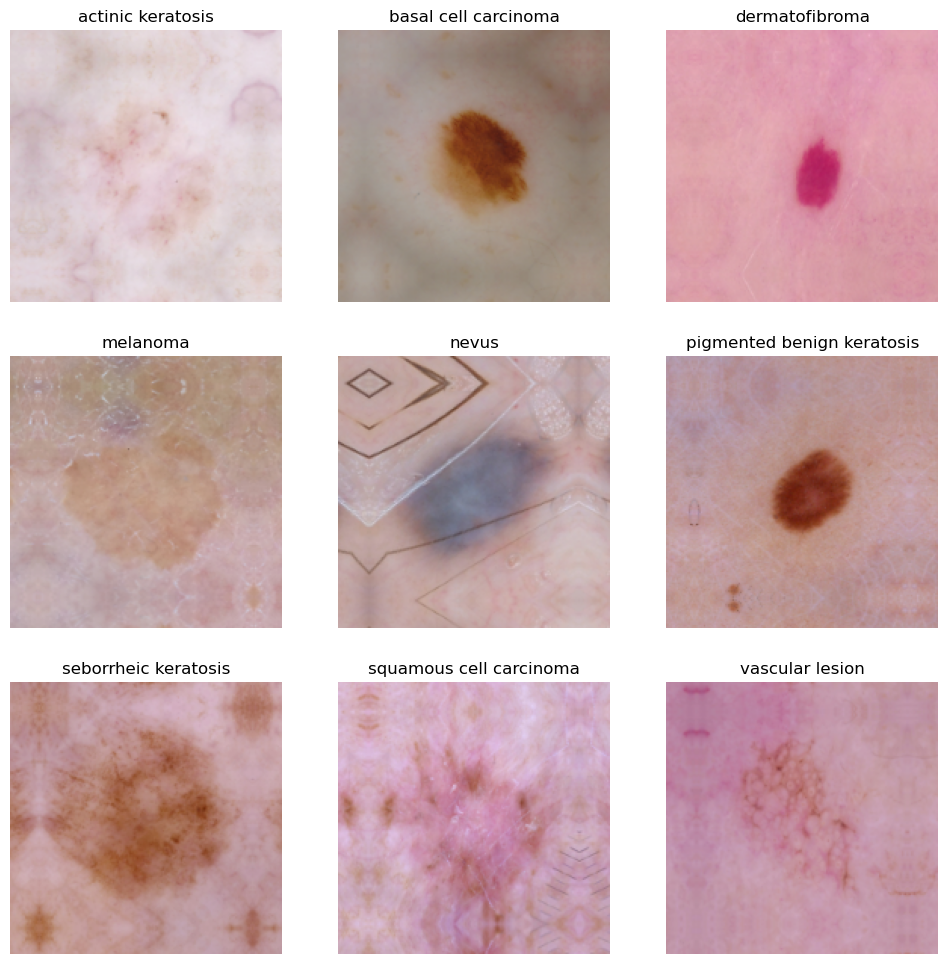

In [42]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[i])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [77]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
### Your code goes here
shape=180,180,3
model=Sequential()
model.add(data_augument, keras.layers.Rescaling(1./255,input_shape=(180,180,3)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(Dense(len(class_names),activation='softmax'))


### Compiling the model

In [78]:
## Your code goes here
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [79]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.3022 - loss: 2.6659 - val_accuracy: 0.1991 - val_loss: 4.8394
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.3898 - loss: 1.9183 - val_accuracy: 0.4049 - val_loss: 1.7770
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.4484 - loss: 1.7423 - val_accuracy: 0.3736 - val_loss: 1.7954
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.4753 - loss: 1.5668 - val_accuracy: 0.4564 - val_loss: 1.5747
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.4917 - loss: 1.5139 - val_accuracy: 0.2662 - val_loss: 3.9145
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.4843 - loss: 1.5017 - val_accuracy: 0.4407 - val_loss: 1.6250
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.5125 - loss: 1.4126 - val_accuracy: 0.5034 - val_loss: 1.4682
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.5152 - loss: 1.4459 - val_accuracy: 0.4899 - val_loss:

### Visualizing the results

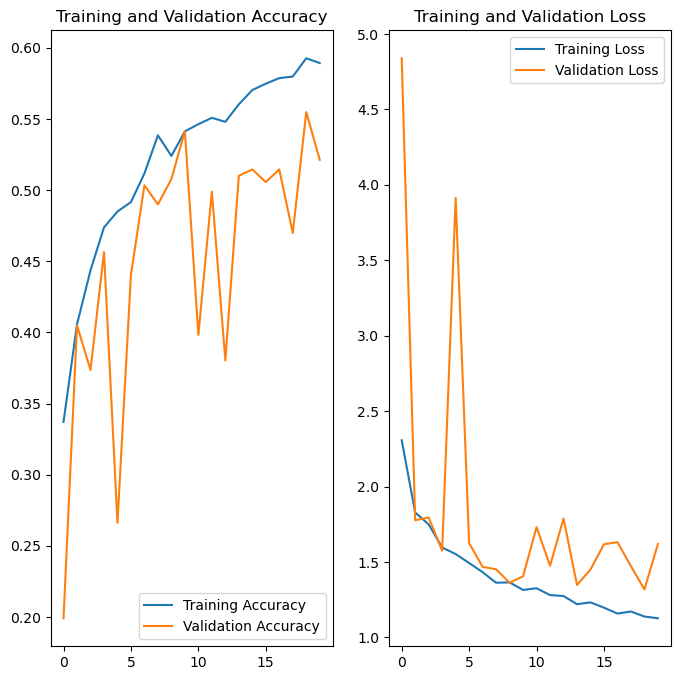

In [80]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [81]:
loss, accuracy = model.evaluate(train_ds, verbose=1)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 225ms/step - accuracy: 0.5407 - loss: 1.4317
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 225ms/step - accuracy: 0.5575 - loss: 1.4767
Accuracy:  0.5407366156578064
Validation Accuracy:  0.5212528109550476
Loss:  1.392699122428894
Validation Loss 1.6199389696121216


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

### Finding from Second Model

1. There is no improvement in accuracy
2. Overfitting is reduced but thats because of drop in accuracy of training set. It could also be due to data augmentation and use of dropouts and batch normalization.

We can increase the epochs to increase the accuracy so it's too early for judgement

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

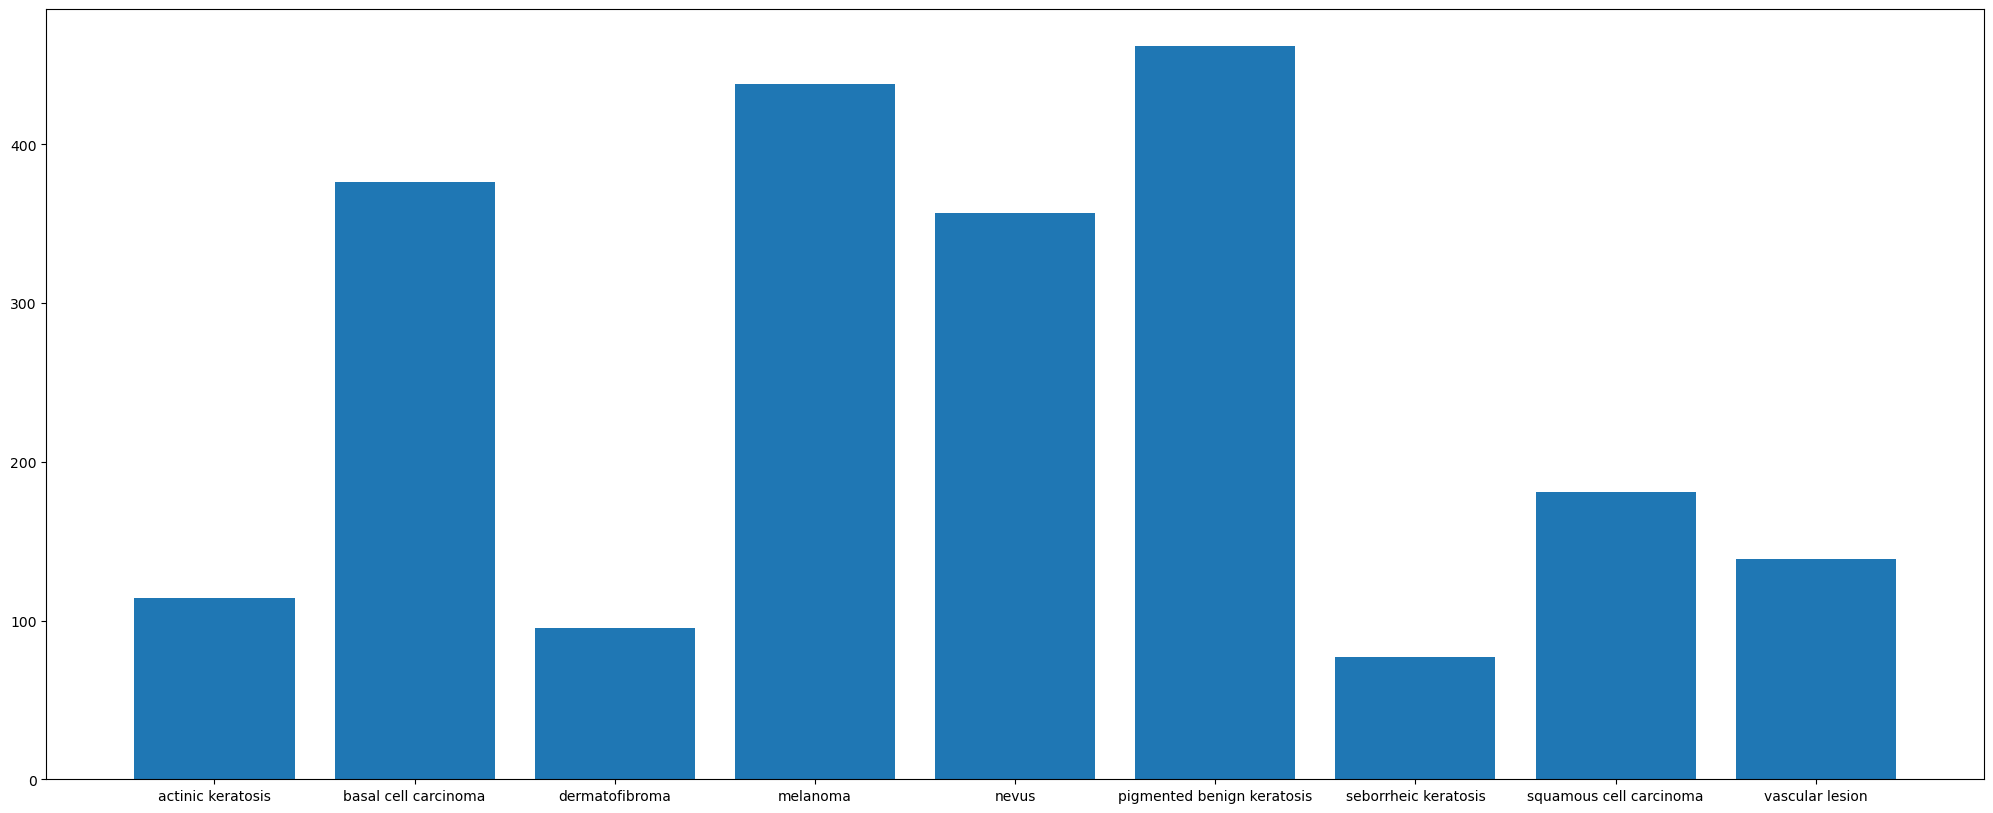

In [82]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples? 
Seborrheic Keratosis
#### - Which classes dominate the data in terms proportionate number of samples?
Pigmented benign Keratosis


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [83]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [12]:
path_to_training_dataset=r'C:\\Users\\q802437\\OneDrive - IQVIA\\Documents\\UpGrad\\Melanoma\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\'
import Augmentor
for i in class_names:
    print(path_to_training_dataset + i)
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

C:\\Users\\q802437\\OneDrive - IQVIA\\Documents\\UpGrad\\Melanoma\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis
C:\\Users\\q802437\\OneDrive - IQVIA\\Documents\\UpGrad\\Melanoma\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma
C:\\Users\\q802437\\OneDrive - IQVIA\\Documents\\UpGrad\\Melanoma\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma
C:\\Users\\q802437\\OneDrive - IQVIA\\Documents\\UpGrad\\Melanoma\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma
C:\\Users\\q802437\\OneDrive - IQVIA\\Documents\\UpGrad\\Melanoma\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\nevus
C:\\Users\\q802437\\OneDrive - IQVIA\\Documents\\UpGrad\\Melanoma\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented ben

Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [13]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [16]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['C:\\Users\\q802437\\OneDrive - IQVIA\\Documents\\UpGrad\\Melanoma\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_20b643a6-75c8-4521-97df-9b4626778af6.jpg',
 'C:\\Users\\q802437\\OneDrive - IQVIA\\Documents\\UpGrad\\Melanoma\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_226860f2-2136-4dec-a5c4-3869de243448.jpg',
 'C:\\Users\\q802437\\OneDrive - IQVIA\\Documents\\UpGrad\\Melanoma\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_4fc747eb-4fb1-4bcc-9333-0f58ead0892a.jpg',
 'C:\\Users\\q802437\\OneDrive - IQVIA\\Documents\\UpGrad\\Melanoma\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic ker

In [17]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [19]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [21]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [22]:
new_df['Label'].value_counts()

Label
actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [23]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [26]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [27]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [50]:
## your code goes here
## You can use Dropout layer if there is an evidence of overfitting in your findings
### Your code goes here
shape=180,180,3
model=Sequential()
model.add(keras.layers.Rescaling(1./255,input_shape=(180,180,3)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(Dense(len(class_names),activation='softmax'))


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [52]:
## Your code goes here
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [54]:
epochs = 50
## Your code goes here, use 50 epochs.

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.3590 - loss: 1.9706 - val_accuracy: 0.1952 - val_loss: 2.8311
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - accuracy: 0.4729 - loss: 1.5302 - val_accuracy: 0.1544 - val_loss: 2.7176
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.5400 - loss: 1.2742 - val_accuracy: 0.3474 - val_loss: 1.8219
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.5983 - loss: 1.0998 - val_accuracy: 0.3601 - val_loss: 1.8140
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 236s 1s/step - accuracy: 0.6661 - loss: 0.9416 - val_accuracy: 0.6422 - val_loss: 1.0073
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.7131 - loss: 0.8055 - val_accuracy: 0.5768 - val_loss: 1.1561
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.7522 - loss: 0.6868 - val_accuracy: 0.5947 - val_loss: 1.1152
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.7931 - loss: 0.5741 - val_accu

#### **Todo:**  Visualize the model results

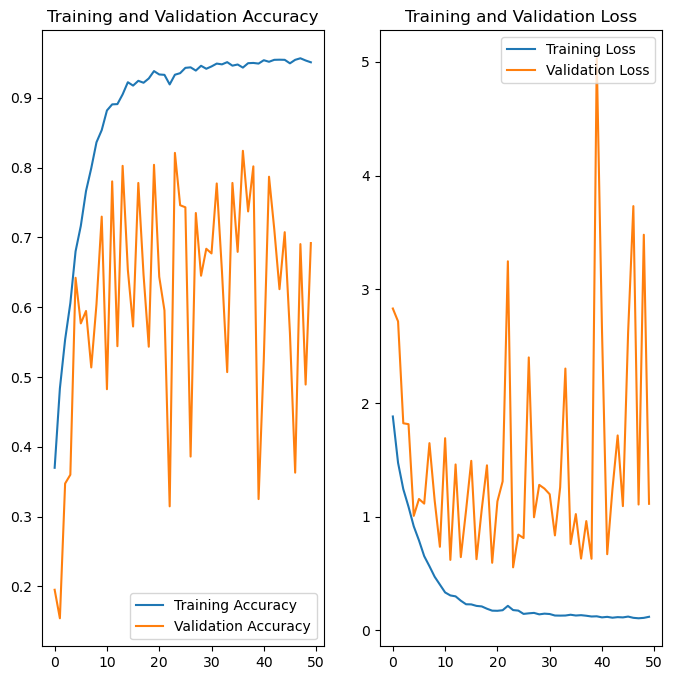

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [56]:
loss, accuracy = model.evaluate(train_ds, verbose=1)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

169/169 ━━━━━━━━━━━━━━━━━━━━ 39s 231ms/step - accuracy: 0.8708 - loss: 0.3531
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 230ms/step - accuracy: 0.7109 - loss: 1.0209
Accuracy:  0.8775964379310608
Validation Accuracy:  0.6919079422950745
Loss:  0.33625760674476624
Validation Loss 1.1136819124221802


1. Accuracy on train and validation set data has increased by using Augmentor library.
2. Overfitting has reduced considerably compared to first case where no augmentation and hyperparameter tuning was used.